In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', None)

In [2]:
data = pd.read_csv('pff_wr_data.csv', low_memory=False)
pbp = pd.read_csv('pbp_data/play_by_play_2019.csv.gz', compression='gzip', low_memory=False)

In [3]:
def modify_name(name):
    split = name.split()
    pbp_name = f'{split[0][0]}.{split[1]}'
    if pbp_name == 'D.Chark':
        return 'D.Chark Jr.'
    if pbp_name == 'D.Metcalf':
        return 'DK.Metcalf'
    if pbp_name == 'J.Ross':
        return 'J.Ross III'
    if pbp_name == 'R.Anderson':
        return 'Ro.Anderson'
    return pbp_name
data['pbp_name'] = data['name'].apply(lambda name:modify_name(name))

In [4]:
pbp_wrs = pbp.groupby(['posteam','receiver'], as_index=False).agg({'epa':'sum','yards_gained':'sum','pass_attempt':'sum', 'first_down':'sum'})
data = data.merge(pbp_wrs, left_on=['team','pbp_name'], right_on=['posteam','receiver'])
team_attempts = pbp.groupby('posteam', as_index=False).agg({'yards_gained':'sum','pass_attempt':'sum', 'first_down':'sum'})
team_attempts.rename(columns={'yards_gained':'team_yards','pass_attempt':'team_attempts','first_down':'team_first_downs'}, inplace=True)
data = data.merge(team_attempts, left_on='team', right_on='posteam')

In [5]:
data['tgt/snap'] = data['pass_attempt']/data['recv_snaps']
data['yards/snap'] = data['yards_gained']/data['recv_snaps']
data['epa/snap'] = data['epa']/data['recv_snaps']
data['fd/snap'] = data['first_down']/data['recv_snaps']

In [6]:
data['tgt_share'] = data['pass_attempt']/data['team_attempts']
data['yards/tpa'] = data['yards_gained']/data['team_attempts']
data['epa/tpa'] = data['epa']/data['team_attempts']
data['fd/tpa'] = data['first_down']/data['team_attempts']

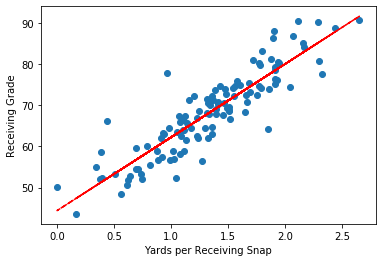

In [7]:
def plot(x, y, index, xlabel='', ylabel='', annotate=[]):
    fix, ax = plt.subplots()
    ax.scatter(x, y)
#     for i, name in enumerate(index):
#         if annotate==[] or name in annotate:
#             annotation = f'{name.split(" ")[1]} ({y.iloc[i]:.3f})'
#             ax.annotate(annotation, (x.iloc[i], y.iloc[i]))

    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

plot(data['yards/snap'], data['recv_grade'], data['name'], xlabel='Yards per Receiving Snap', ylabel='Receiving Grade')

In [8]:
data.corr()**2

,rank,offense_grade,recv_grade,rblk_grade,offense_snaps,recv_snaps,rblk_snaps,age,weight,draft_year,epa,yards_gained,pass_attempt,first_down,team_yards,team_attempts,team_first_downs,tgt/snap,yards/snap,epa/snap,fd/snap,tgt_share,yards/tpa,epa/tpa,fd/tpa
rank,1.000000,0.966663,0.951499,0.023984,0.382117,0.339199,0.331054,0.007282,0.020276,0.017860,0.633595,0.710161,0.593154,0.706182,0.031900,0.005457,0.015458,0.537980,0.765969,0.557540,0.737895,0.600650,0.713895,0.638031,0.717581
offense_grade,0.966663,1.000000,0.983846,0.025271,0.368053,0.331541,0.310571,0.005409,0.027352,0.016747,0.672192,0.732350,0.613410,0.735018,0.028765,0.007050,0.013388,0.566176,0.793743,0.575142,0.768201,0.612615,0.726519,0.667384,0.737149
recv_grade,0.951499,0.983846,1.000000,0.003872,0.355490,0.326971,0.288876,0.009465,0.020645,0.023553,0.678447,0.727053,0.608988,0.733106,0.027685,0.007159,0.012395,0.571749,0.800159,0.589128,0.779845,0.608142,0.721125,0.673256,0.735414
rblk_grade,0.023984,0.025271,0.003872,1.000000,0.015268,0.003514,0.048010,0.016184,0.044181,0.021648,0.011074,0.005582,0.000943,0.003327,0.029884,0.001776,0.030886,0.002221,0.001775,0.015450,0.000065,0.000337,0.004218,0.010150,0.002243
offense_snaps,0.382117,0.368053,0.355490,0.015268,1.000000,0.935111,0.785442,0.026738,0.029029,0.045060,0.406424,0.711415,0.726269,0.692690,0.029567,0.018645,0.021304,0.171146,0.292070,0.166480,0.209514,0.722944,0.706033,0.404428,0.695432
recv_snaps,0.339199,0.331541,0.326971,0.003514,0.935111,1.000000,0.547441,0.036043,0.016124,0.059586,0.370261,0.703535,0.761873,0.697094,0.008917,0.066574,0.007240,0.177735,0.264830,0.133711,0.197055,0.722651,0.665459,0.349158,0.666122
rblk_snaps,0.331054,0.310571,0.288876,0.048010,0.785442,0.547441,1.000000,0.007976,0.051337,0.014096,0.345454,0.498039,0.440335,0.468882,0.078410,0.013144,0.052203,0.102575,0.241873,0.178317,0.163472,0.491666,0.547973,0.379881,0.524925
age,0.007282,0.005409,0.009465,0.016184,0.026738,0.036043,0.007976,1.000000,0.011559,0.916455,0.000330,0.006723,0.019399,0.016530,0.001674,0.006534,0.001391,0.001751,0.000004,0.001362,0.003031,0.014428,0.004233,0.000683,0.012826
weight,0.020276,0.027352,0.020645,0.044181,0.029029,0.016124,0.051337,0.011559,1.000000,0.004281,0.029610,0.029431,0.011194,0.032727,0.000277,0.006129,0.000539,0.001544,0.012101,0.016386,0.014964,0.007619,0.025139,0.026219,0.027768
draft_year,0.017860,0.016747,0.023553,0.021648,0.045060,0.059586,0.014096,0.916455,0.004281,1.000000,0.000117,0.018832,0.038548,0.034934,0.008845,0.014880,0.008433,0.006726,0.002115,0.000475,0.010140,0.028652,0.012666,0.000016,0.026829


In [9]:
rows = ['epa','yards_gained','pass_attempt','first_down','tgt/snap','yards/snap','epa/snap','fd/snap','tgt_share','yards/tpa','epa/tpa','fd/tpa']
renames = {'yards_gained':'yards', 'pass_attempt':'targets','first_down':'first_downs','tgt/snap':'targets per recv snap','yards/snap':'yards per recv snap','epa/snap':'epa per recv snap'}
(data.corr()**2).loc['recv_grade', rows].rename(renames).round(3)

epa                      0.678
yards                    0.727
targets                  0.609
first_downs              0.733
targets per recv snap    0.572
yards per recv snap      0.800
epa per recv snap        0.589
fd/snap                  0.780
tgt_share                0.608
yards/tpa                0.721
epa/tpa                  0.673
fd/tpa                   0.735
Name: recv_grade, dtype: float64